# **Skin Disease Prediction**
@[shaheer-shamsi](https://github.com/shaheer-shamsi)\
@[ParallaX07](https://github.com/ParallaX07)

## DATASETS

HAM10000 ("Human Against Machine with 10000 training images") dataset -  consists of 10015 dermatoscopic images with 7 different classes of skin diseases namely :
- Benign keratosis-like lesions
- Actinic keratoses
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Melanocytic nevi
- Vascular lesions

_Link_:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T

DermNet dataset - consisting of around 19,500 images categorizing 23 types of skin diseases taken from http://www.dermnet.com/dermatology-pictures-skin-disease-pictures. Train and test sets are split at approximately 15,500 and 4,500 images. 23 types of skin diseases include:
 - Acne and Rosacea
 - Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
 - Atopic Dermatitis
 - Bullous Disease
 - Cellulitis Impetigo and other Bacterial Infections
 - Eczema
 - Exanthems and Drug Eruptions
 - Hair Loss Alopecia and other Hair Diseases
 - Herpes HPV and other STDs
 - Light Diseases and Disorders of Pigmentation
 - Lupus and other Connective Tissue diseases
 - Melanoma Skin Cancer Nevi and Moles
 - Nail Fungus and other Nail Disease
 - Poison Ivy and other Contact Dermatitis
 - Psoriasis Lichen Planus and related diseases
 - Scabies Lyme Disease and other Infestations and Bites
 - Seborrheic Keratoses and other Benign Tumors
 - Systemic Disease
 - Tinea Ringworm Candidiasis and other Fungal Infections
 - Urticaria Hives
 - Vascular Tumors
 - Vasculitis
 - Warts Molluscum and other Viral Infections

_Link_:
http://www.dermnet.com/dermatology-pictures-skin-disease-pictures

ISIC BCN_20000
BCN_20000 - composed of 19,424 dermoscopic images of skin lesions captured from 2010 to 2016 in the facilities of the Hospital Clínic in Barcelona with 9 different diagnostic categories of skin diseases namely :
- Melanoma
- Melanocytic nevus
- Basal cell carcinoma
- Actinic keratosis
- Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
- Dermatofibroma
- Vascular lesion
- Squamous cell carcinoma
- None

_Link_:
https://challenge.isic-archive.com/data/#2019


SCIN (Skin Condition Image Network) dataset - gathered from health system sources with representative images from internet users which contains 5,000+ volunteer contributions composed of 10,000+ images)

_Link_:
https://console.cloud.google.com/storage/browser/dx-scin-public-data


Fitzpatrick17k dataset - composed of 16,577 clinical images sourced from two dermatology atlases — DermaAmin and Atlas Dermatologico — with Fitzpatrick skin type labels that are annotated to represent about 114 skin diseases.

_Link_:
https://github.com/mattgroh/fitzpatrick17k

In [ ]:
#importing libraries and packages
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
from google.colab import files

HAM10000_metadata.csv - csv file that includes the metadata of training images, the features of which are -

1. Lesion_id
2. Image_id
3. Dx
4. Dx_type
5. Age
6. Sex
7. Localization


In [ ]:
# reading the data from HAM_metadata.csv
uploaded = files.upload()
#df = pd.read_csv('/dataset/ham10000/HAM10000_metadata.csv')

Saving HAM10000_metadata.csv to HAM10000_metadata.csv


In [ ]:
# reading the data from HAM_metadata.csv
df = pd.read_csv('HAM10000_metadata.csv')
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
# reading the data from fitzpatrick17k.csv
fitzpatrick17k_df = pd.read_csv('fitzpatrick17k.csv')
fitzpatrick17k_df.head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...

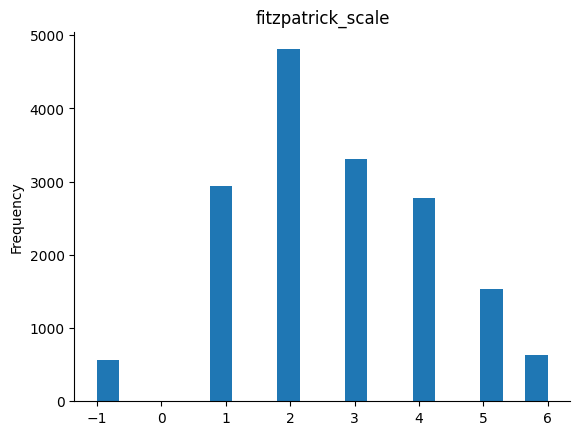

In [ ]:
# @title fitzpatrick_scale

from matplotlib import pyplot as plt
fitzpatrick17k_df['fitzpatrick_scale'].plot(kind='hist', bins=20, title='fitzpatrick_scale')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-21-e7f18ef5da08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fitzpatrick17k_df, x='fitzpatrick_scale', y='label', inner='box', palette='Dark2')


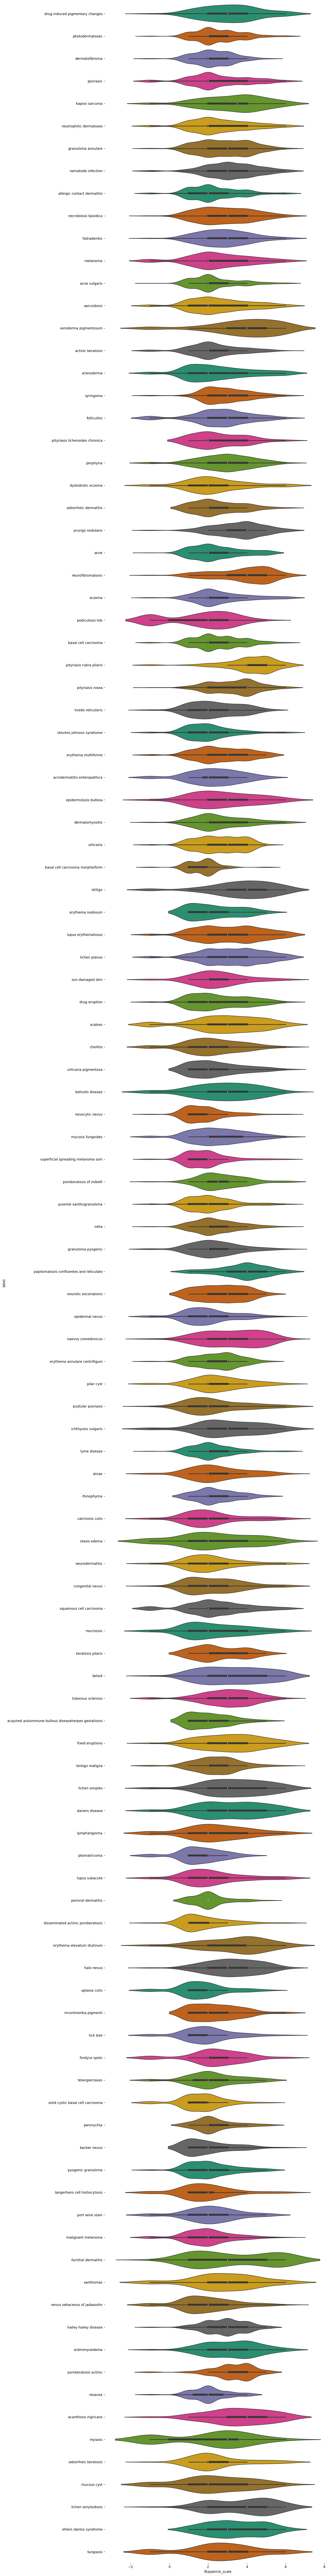

In [ ]:
# @title label vs fitzpatrick_scale

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fitzpatrick17k_df['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fitzpatrick17k_df, x='fitzpatrick_scale', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-4-483fe28752e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='dx', inner='box', palette='Dark2')


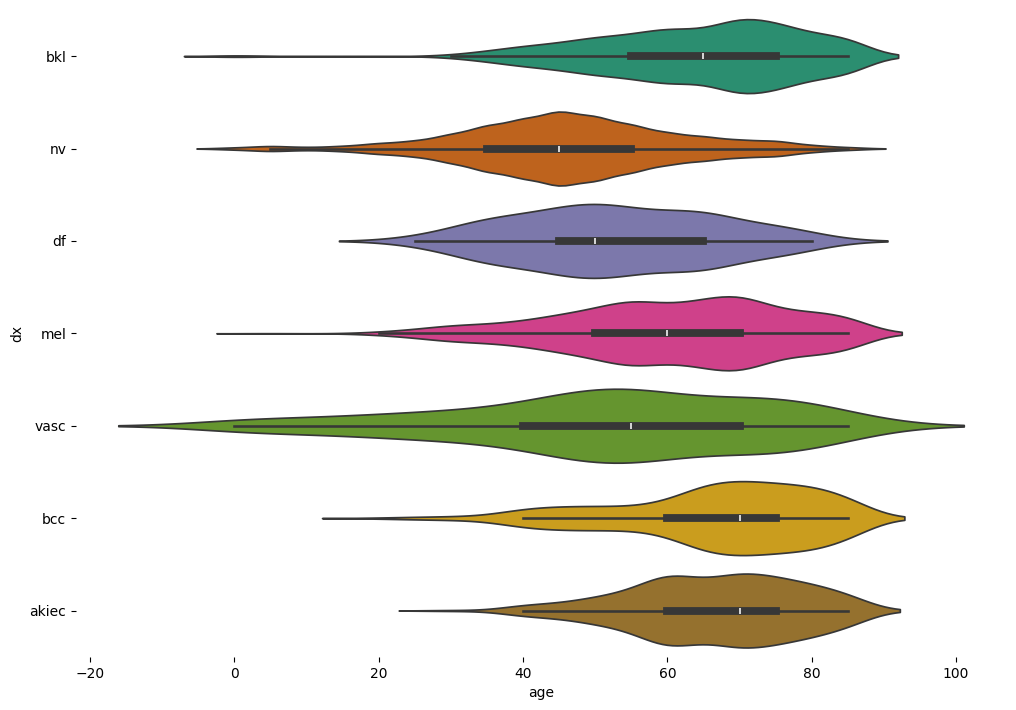

In [ ]:
# @title dx vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['dx'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='dx', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

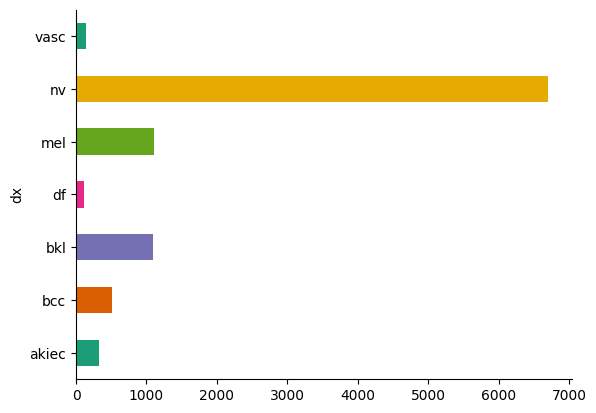

In [ ]:
# @title dx

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('dx').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

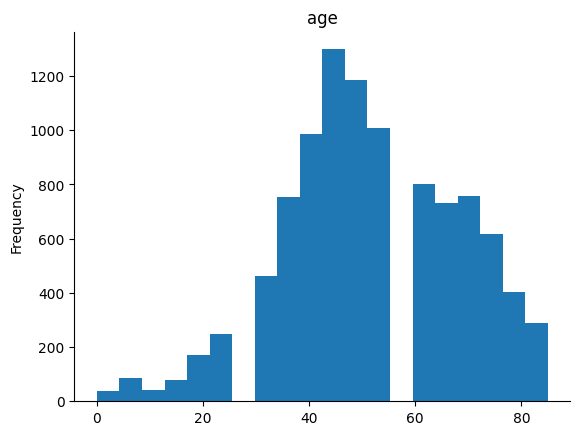

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [ ]:
df.describe()

age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

<ipython-input-22-b00f52ecdd18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y, x=x, palette="dark")
<ipython-input-22-b00f52ecdd18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y, x=x, palette="dark")
<ipython-input-22-b00f52ecdd18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y, x=x, palette="dark")


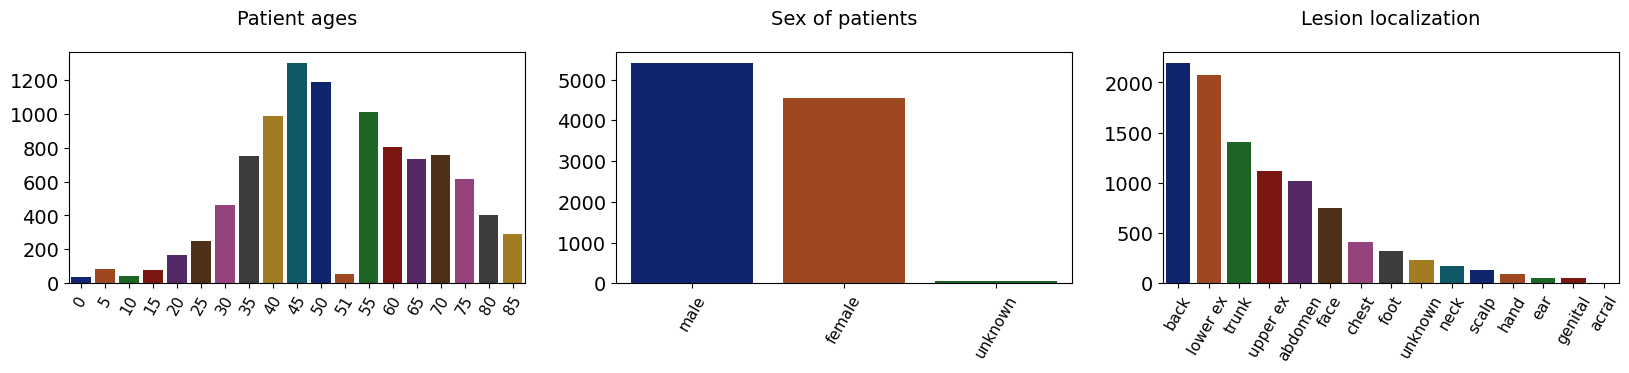

In [ ]:
def bar_plt(y, x, title):
    sns.barplot(y=y, x=x, palette="dark")
    plt.xticks(rotation=60, fontsize=11)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=14, pad=20)

# plot histogram of patient ages
fig, axes = plt.subplots(1, 3, figsize=(20, 3))
plt.subplot(1, 3, 1)
data = df['age'].value_counts()
bar_plt(data.tolist(), [int(x) for x in data.keys().tolist()], title='Patient ages')

# plot bar chart of patients sex
plt.subplot(1, 3, 2)
data = df['sex'].value_counts()
bar_plt(data.tolist(), data.keys().tolist(), title='Sex of patients')

# plot barchart of localization of lesion on the body
plt.subplot(1, 3, 3)
data = df['localization'].value_counts()
bar_plt(data.tolist(), [x[:8] for x in data.keys().tolist()], title='Lesion localization')

## **Data Cleaning**

### Removing NULL values and performing visualizations to gain insights of dataset: Univariate and Bivariate Analysis

In [ ]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

The feature 'age' consists of 57 null records. Thus, we need to replace them with the mean of 'age' since dropping 57 records would lead to loss of data.

In [ ]:
df['age']=df['age'].fillna(int(df['age'].mean()))

In [ ]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Now, the null values have been removed.

In [ ]:
lesion_type_dict = {
    'bkl': 'Benign keratosis-like lesions ',
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}
base_skin_dir = '../dataset/ham10000'

# merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
1  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
2  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
3  ../input/skin-cancer-mnist-ham10000/ham10000_i...   
4  ../input/skin-cancer-mnist-ham10000/ham10000_i...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

## **Image Preprocessing**

### Resizing of images because the original dimensions of 450 * 600 * 3 take long time to process in Neural Networks

In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

Showcasing some samples of each class of the dataset in the images below:

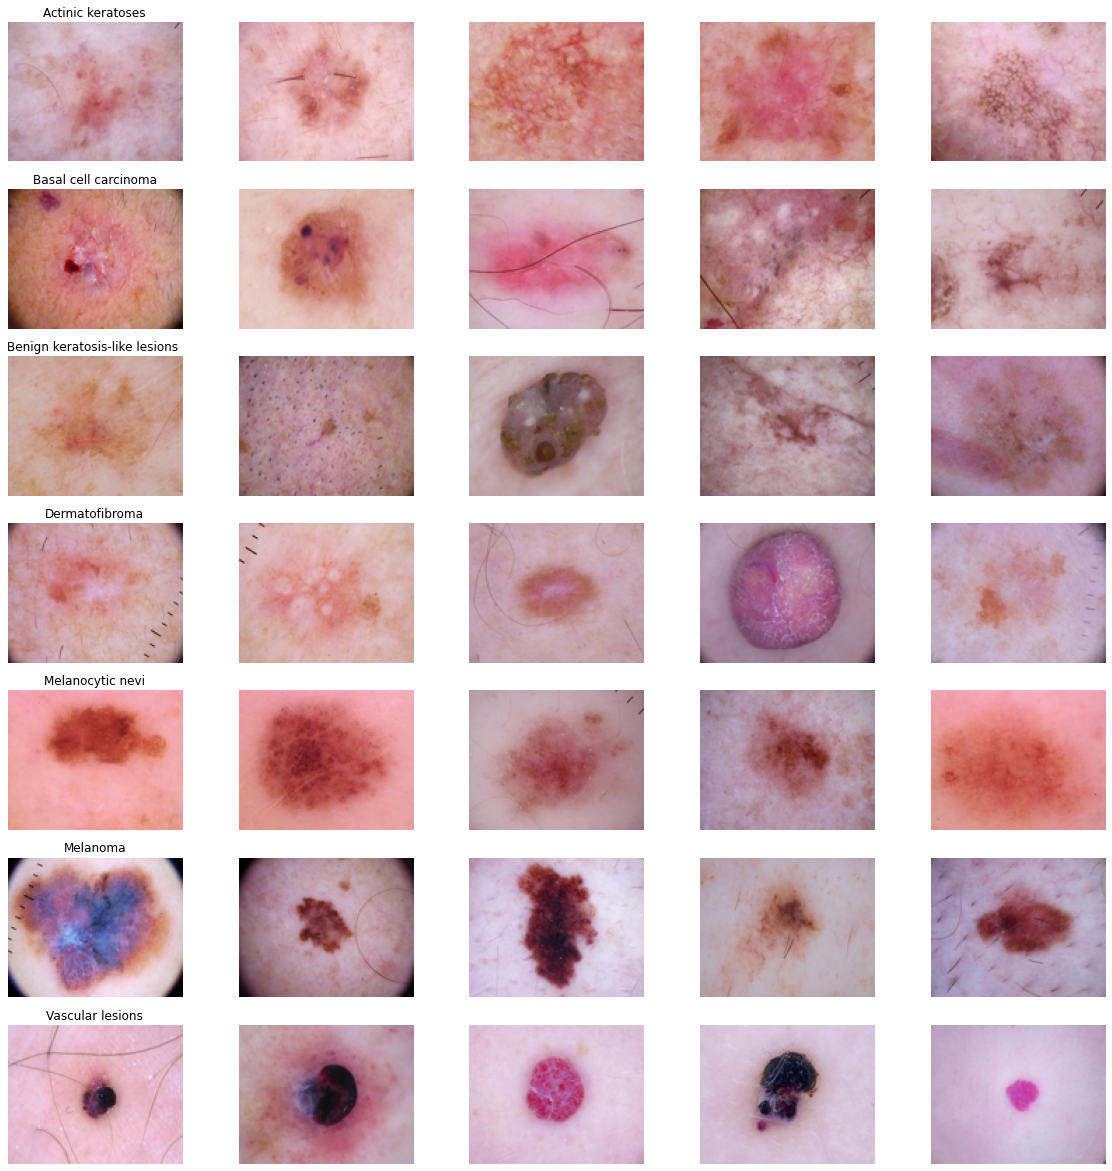

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

## **Exploratory Data Analysis**

EDA is yet to be completed.

### UNIVARIATE ANALYSIS

<AxesSubplot:title={'center':'CELL TYPE'}, ylabel='Count'>

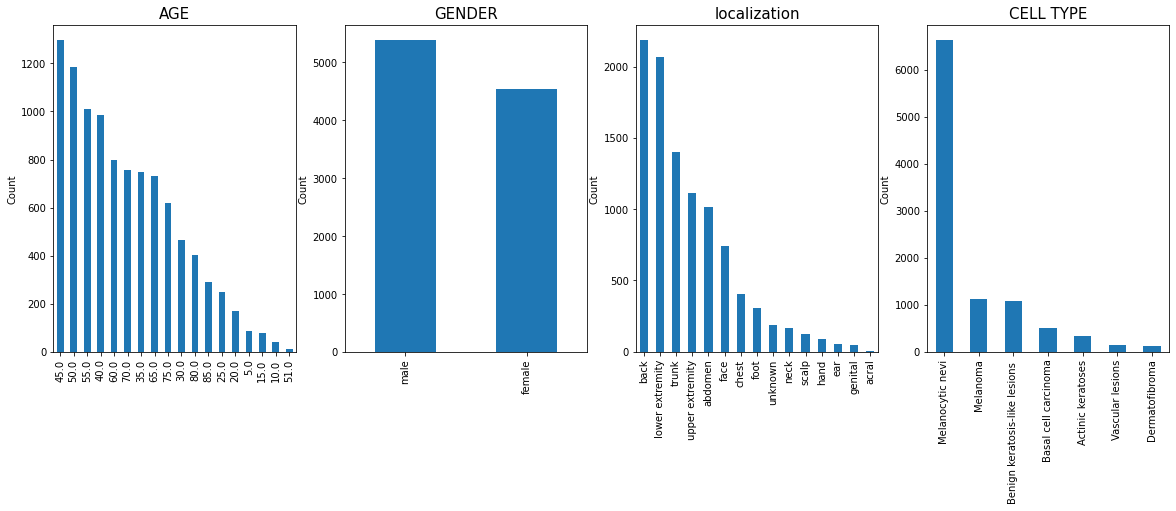

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

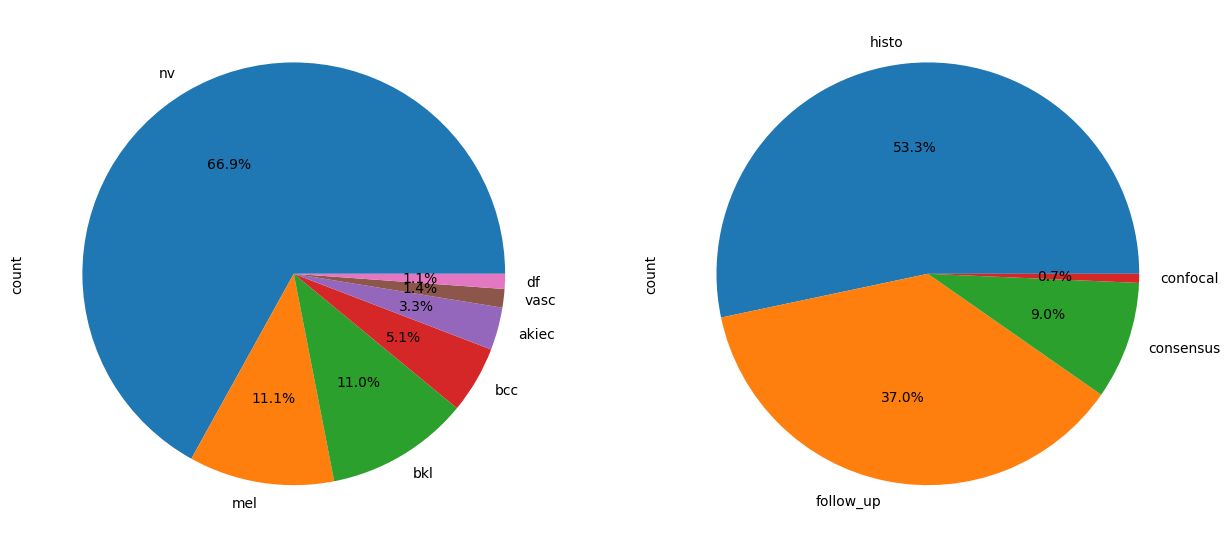

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Type of skin disease and method of detection was determined.

### BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

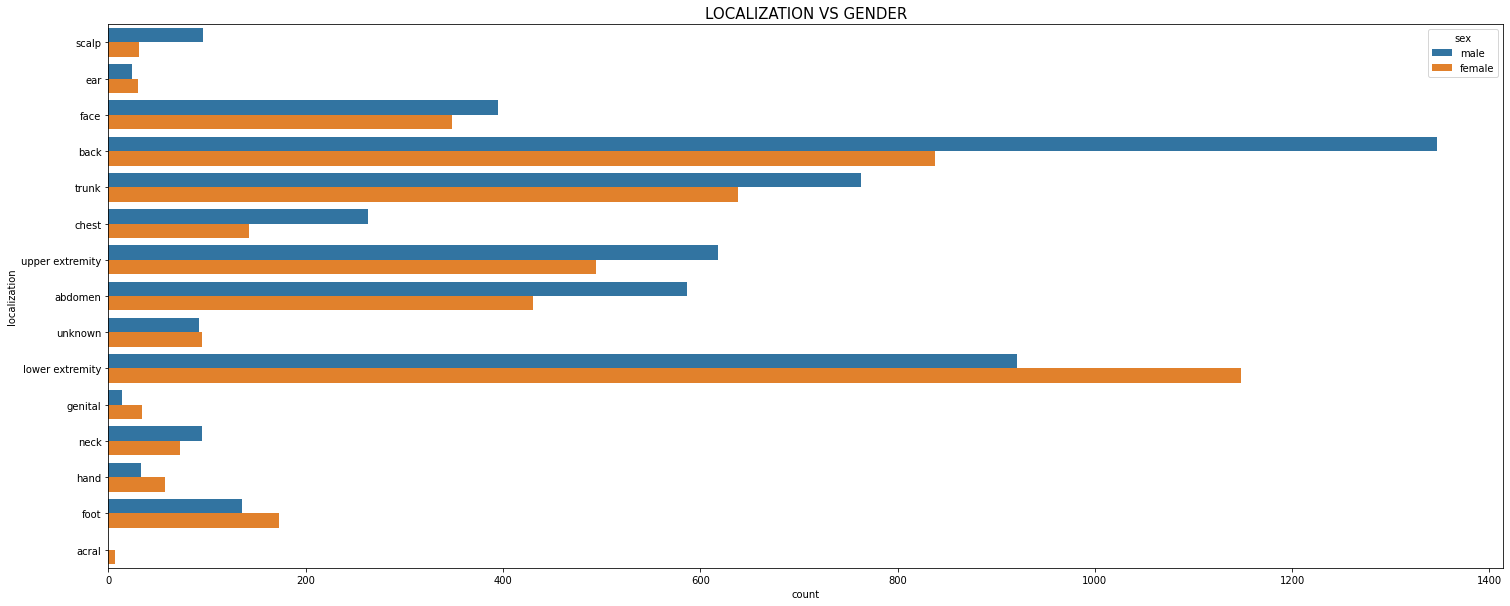

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

<Axes: title={'center': 'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

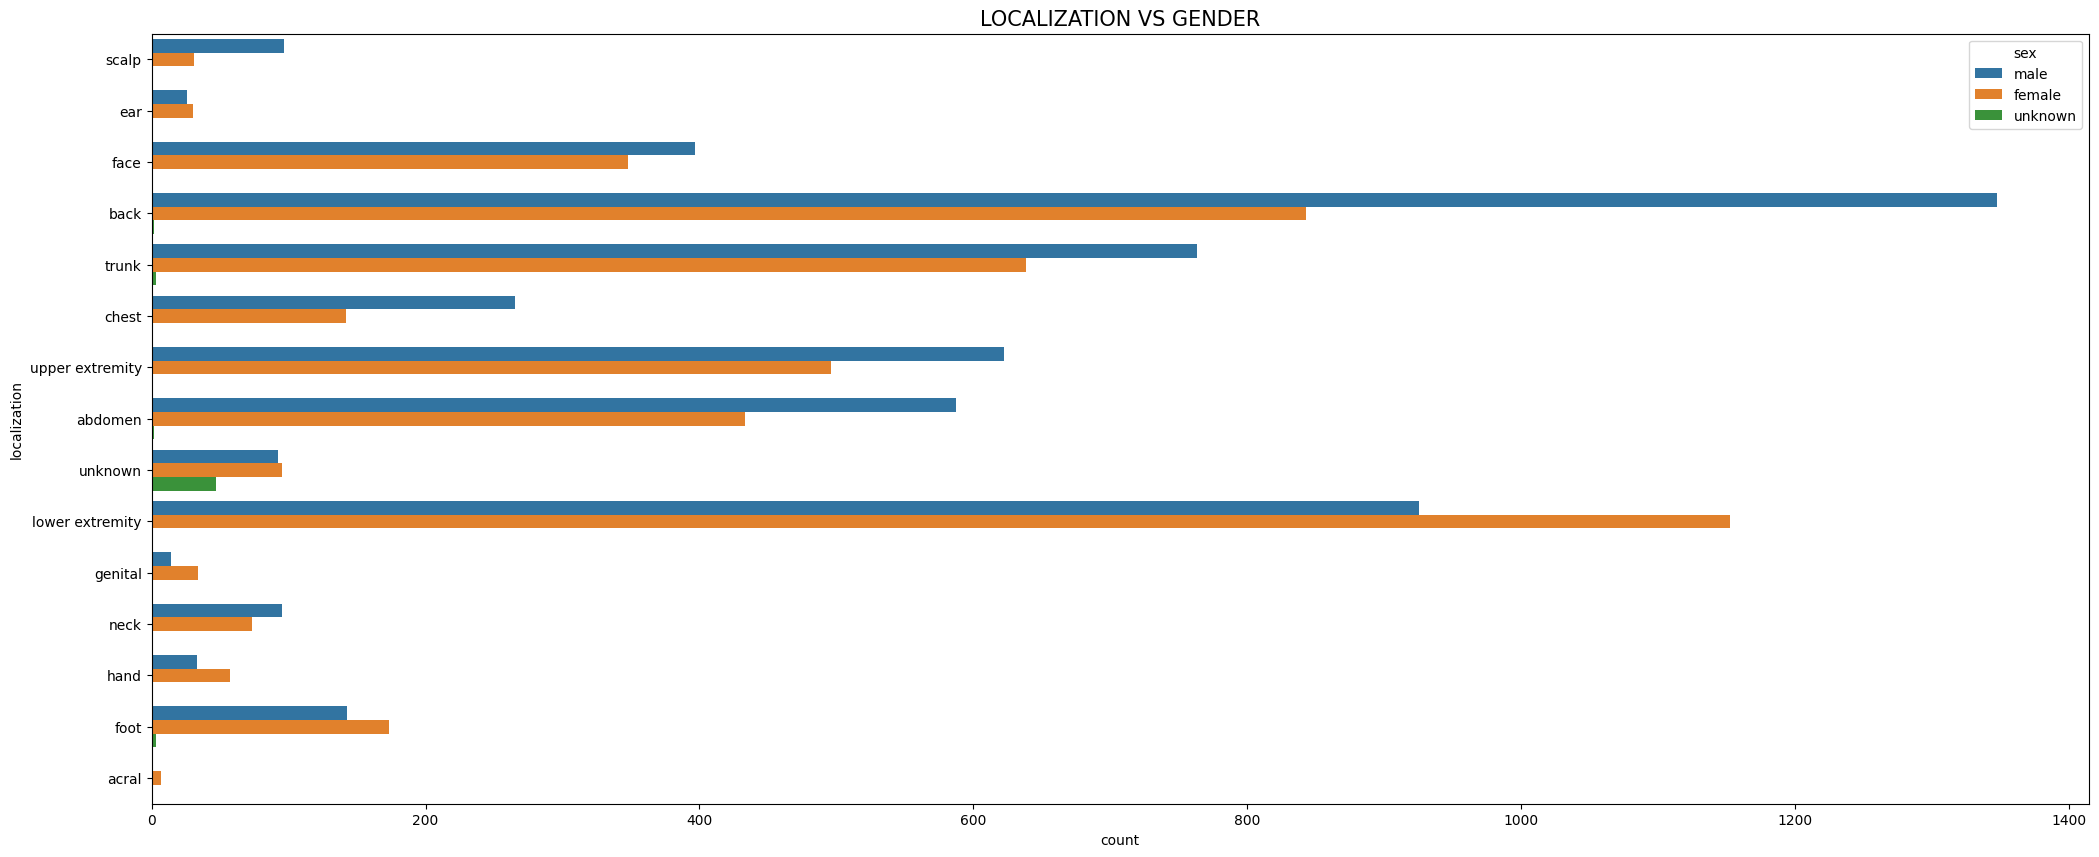

In [ ]:
# for localization and gender type co-relation
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

<AxesSubplot:title={'center':'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

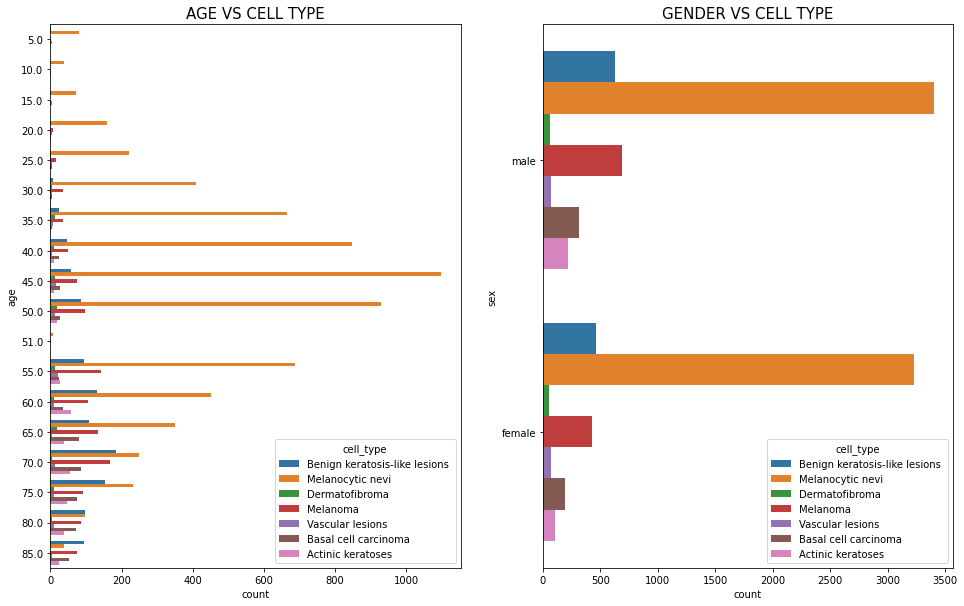

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

Completed.


Will be used to determine:
* Most commonly affected region using localization
* Comparison between men and women
* Effect on different age groups
* Other risk criteria


## **Neural Net**:
A simple NN will be used to evaluate rudimentary accuracy on each samples from each dataset using keras model. Yet to be completed



## **CNN (Convolutional Neural Net):**

CNNs are better for image classification tasks since CNN has features parameter sharing and dimensionality reduction.


Data Augmentation will have to be used before training to generate more samples from each dataset and analyse loss on each pass otherwise compute requirement will be too high. ReLU or Softmax activation function will be used.


Pooling parameters are yet to be defined.

Confusion Matrix will be used to analyse accuracy.

In [ ]:
# rudimentary CNN: Conv2D to LReLU to MaxPool2D to Dropout X3 to Flatten to Dense256 to Out
# TRAINING ATTEMPTED LOCALLY
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, LeakyReLU

# reduced input size from HAM10000
input = (100, 125, 3)
num_classes = 7

model = Sequential()

# First convolution block
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', input_shape=input))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Second convolution block
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Third convolution block
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.35))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()


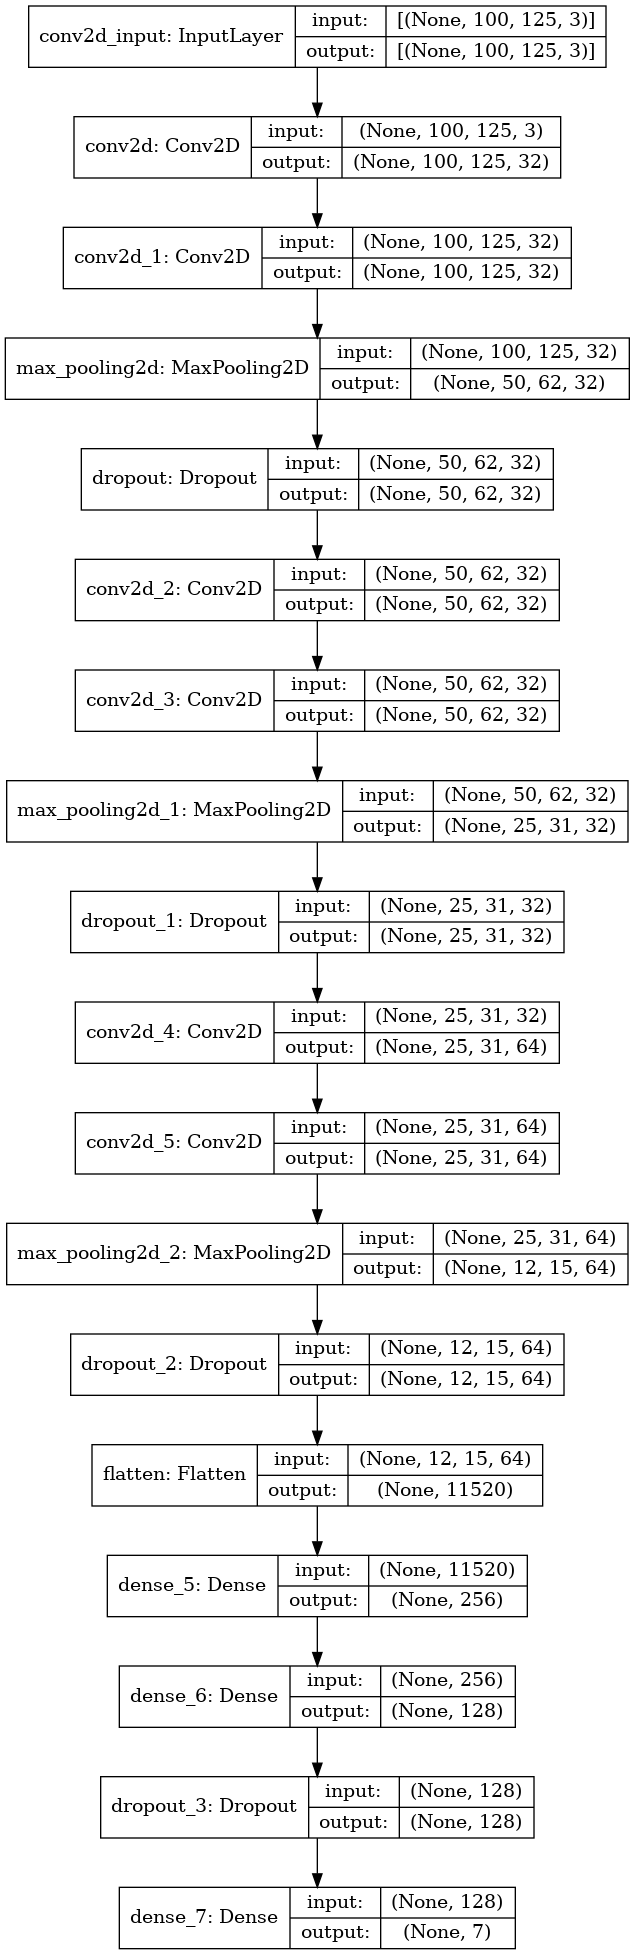

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# compiling the model
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# learning rate correction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# defining train, validation parameters and dataset split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)

# reshaping into reduced dimension 100x125x3 for faster training time
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))


# data augmentation using ImageDataGenerator to introduce variance and avoid overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.12,
        height_shift_range=0.12,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

# fitting the model
epochs = 60
batch_size = 16
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report,confusion_matrix

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
376/376 [==============================] - 25s 49ms/step - loss: 1.1575 - accuracy: 0.6512 - val_loss: 1.0649 - val_accuracy: 0.6463
Epoch 2/60
376/376 [==============================] - 18s 47ms/step - loss: 1.0054 - accuracy: 0.6438 - val_loss: 0.9819 - val_accuracy: 0.6552
Epoch 3/60
376/376 [==============================] - 18s 47ms/step - loss: 0.9298 - accuracy: 0.6650 - val_loss: 0.9224 - val_accuracy: 0.6642
Epoch 4/60
376/376 [==============================] - 18s 48ms/step - loss: 0.9121 - accuracy: 0.6695 - val_loss: 0.8763 - val_accuracy: 0.6806
Epoch 5/60
376/376 [==============================] - 18s 47ms/step - loss: 0.8239 - accuracy: 0.7089 - val_loss: 0.8780 - val_accuracy: 0.6821
Epoch 6/60
376/376 [==============================] - 18s 48ms/step - loss: 0.8103 - accuracy: 0.7061 - val_loss: 0.8691 - val_accuracy: 0.6851
Epoch 7/60
376/376 [==============================] - 18s 47ms/step - loss: 0.7967 - accuracy: 0.7116 - val_loss: 0.8406 - val_accuracy:

## **Tranfer Learning**

When training on huge datasets, its optimal to use a pretrained model to reduce time and resource constraints and gain better accuracy on smaller datasets. ResNET is a widely used model for medical imaging and image classification tasks. We hope to use a pretrained model of ResNET and stack our model to gain better results.

Possible routes for improvement:
- batch normalization (further study required),
- padding zeroes to reduce computation,
- custom weights for each class


## **Comparing accuracy, learning rate and confusion matrix**



In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

21/21 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.7433
Validation: accuracy = 0.743284  ;  loss_v = 0.688070
Test: accuracy = 0.768642  ;  loss = 0.618472


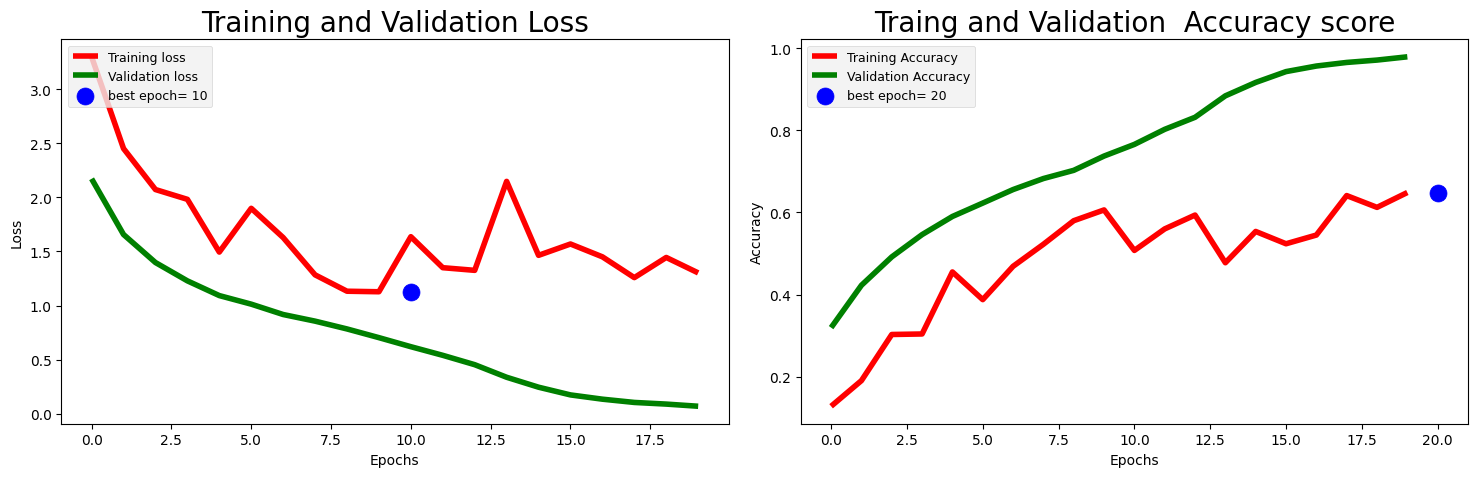

In [ ]:
visualize_training_results(history)

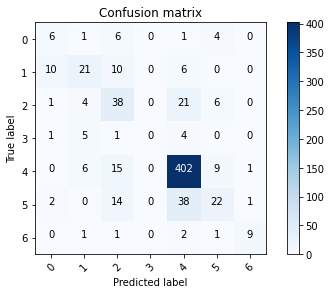

In [ ]:
import itertools
# confusion matrix generator
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# using validation dataset
Y_pred = model.predict(x_validate)
# convert to vector
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_validate,axis = 1)

# confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7))


**Feature Importance:**

Feature importance measures the increase in the prediction error of the model after we change combination of features. Perhaps dropping redundant features.
